In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import csv
import pickle
import seaborn as sns
from sklearn import decomposition
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef
sns.set(color_codes=True)
%matplotlib inline
# Import necessary modules
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
#data_frame = pd.read_csv("/content/drive/MyDrive/hemolysis/FVs-Merged-Labled-pos_neg.csv")
data_frame = pd.read_csv("/content/drive/MyDrive/hemolysis/FVs-labled-balanced_data.csv")

In [ ]:
data_frame.shape

(659, 155)

In [ ]:
data_frame.head(5)

,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F145,F146,F147,F148,F149,F150,F151,F152,Positive,Nagetive
0,2246,17529,178835,2053029,17122,132541,1349681,169224,1292329,1895104,...,1177,1364,2346,1856,1284,346,1360,0,0,1
1,165,478,1678,6640,399,1112,3778,1159,3106,3747,...,0,0,4,0,6,0,0,0,1,0
2,68662,2861239,157505727,9749775799,2849775,118972051,6555964967,154876633,6463049855,9452836059,...,721284,697783,1338539,1199780,2231554,301698,961917,0,0,1
3,5711,68981,1079211,18972389,68319,824753,12846919,1070043,12849709,18852219,...,3119,3818,16646,7374,9779,627,6281,0,1,0
4,22549,545235,17457523,630421305,537731,12928489,412707723,16903889,405205129,597250961,...,103999,125606,155523,130537,210527,25350,67594,0,0,1


In [ ]:
data_frame.tail(5)

,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F145,F146,F147,F148,F149,F150,F151,F152,Positive,Nagetive
654,11616,193579,4309825,108625033,192995,3185423,70654429,4184339,68473863,102293429,...,47505,24779,51494,33022,24382,5534,16281,0,0,1
655,3131,27461,313769,4050227,27260,238295,2720505,300460,2631233,3703526,...,2101,1218,3836,3863,2435,559,2310,0,1,0
656,3533,34467,439877,6345807,34033,329911,4201483,427207,4093255,6047773,...,1554,3777,5415,2044,3817,1072,2309,0,0,1
657,571,2778,17768,128628,2369,10952,67892,12533,55410,74735,...,31,61,217,38,127,0,0,0,1,0
658,7095,99662,1833298,38026724,98632,1365887,24824201,1764092,24247495,35329408,...,14627,10870,17967,8694,13512,1402,5403,0,0,1


In [ ]:
print (data_frame.isnull().values.any())

False


In [ ]:
def plot_corr(data_frame, size=11):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        data_frame: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """

    corr = data_frame.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks


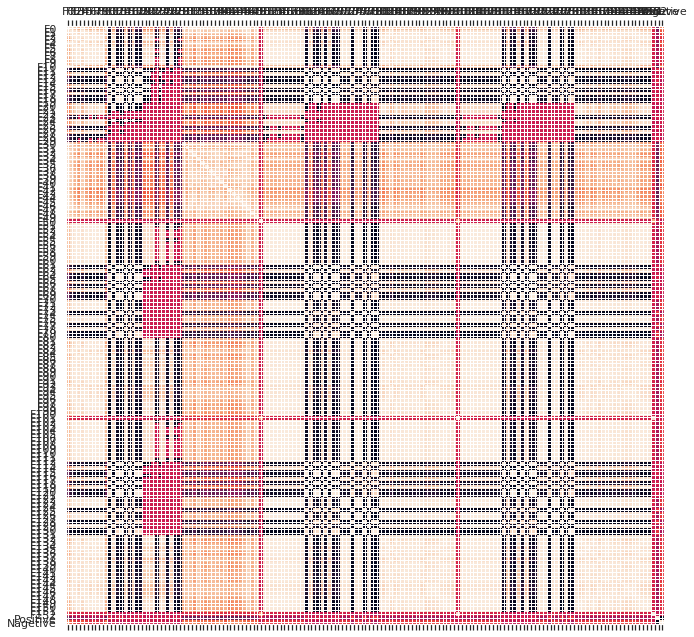

In [ ]:
plot_corr(data_frame)

In [ ]:
data_frame.corr()

,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F145,F146,F147,F148,F149,F150,F151,F152,Positive,Nagetive
F0,1.000000,0.929674,0.793939,0.682331,0.926944,0.790352,0.679187,0.789192,0.678009,0.678327,...,0.833822,0.860623,0.839253,0.781536,0.702468,0.728323,0.699992,0.113896,-0.441103,0.441103
F1,0.929674,1.000000,0.959260,0.893962,0.999804,0.957387,0.891769,0.956859,0.891028,0.891384,...,0.957965,0.975713,0.974000,0.950458,0.902815,0.913931,0.898352,0.092856,-0.281906,0.281906
F2,0.793939,0.959260,1.000000,0.983421,0.961158,0.999919,0.982455,0.999794,0.982146,0.982337,...,0.954569,0.965284,0.981817,0.995807,0.984334,0.981011,0.980016,0.059769,-0.166309,0.166309
F3,0.682331,0.893962,0.983421,1.000000,0.897017,0.984537,0.999962,0.984535,0.999915,0.999873,...,0.906046,0.913399,0.941697,0.982785,0.997376,0.984345,0.994308,0.033819,-0.103779,0.103779
F4,0.926944,0.999804,0.961158,0.897017,1.000000,0.959513,0.894949,0.959142,0.894295,0.894717,...,0.959632,0.977292,0.974819,0.952372,0.905407,0.916538,0.900838,0.091409,-0.278749,0.278749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F150,0.728323,0.913931,0.981011,0.984345,0.916538,0.981765,0.984099,0.981617,0.983948,0.983887,...,0.905844,0.925173,0.938625,0.975840,0.986183,1.000000,0.983839,0.069992,-0.144395,0.144395
F151,0.699992,0.898352,0.980016,0.994308,0.900838,0.980885,0.994231,0.980514,0.994033,0.993744,...,0.895021,0.905034,0.933839,0.980844,0.994775,0.983839,1.000000,0.051739,-0.119553,0.119553
F152,0.113896,0.092856,0.059769,0.033819,0.091409,0.058013,0.032473,0.057418,0.031735,0.031530,...,0.070303,0.072672,0.055805,0.055708,0.043019,0.069992,0.051739,1.000000,-0.018613,0.018613
Positive,-0.441103,-0.281906,-0.166309,-0.103779,-0.278749,-0.164169,-0.102455,-0.162951,-0.101744,-0.101563,...,-0.188995,-0.222310,-0.190985,-0.151792,-0.119770,-0.144395,-0.119553,-0.018613,1.000000,-1.000000


Check class distribution
Rare events are hard to predict

In [ ]:
num_obs = len(data_frame)
num_true = len(data_frame.loc[data_frame['Positive'] == 1])
print(num_true)

num_false = len(data_frame.loc[data_frame['Nagetive'] == 1])

print(num_false)

print("Number of True cases:  {0} ({1:2.2f}%)".format(num_true, ((1.00 * num_true)/(1.0 * num_obs)) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (( 1.0 * num_false)/(1.0 * num_obs)) * 100))

329
330
Number of True cases:  329 (49.92%)
Number of False cases: 330 (50.08%)


**Spliting the data**
70% for training, 30% for testing



In [ ]:
#from sklearn.cross_validation import train_test_split

#feature_col_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']
predicted_class_names = ['Positive','Nagetive']

# Separating out the target
y = data_frame.loc[:,['Positive']].values

df2 = data_frame.drop(['Positive','Nagetive'], axis=1)
df2.reset_index(inplace=True)
# Separating out the features
x = df2.values
#print(x)

# Standardizing the features
x = StandardScaler().fit_transform(x)


In [ ]:
# evaluate a logistic regression model using k-fold cross-validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

# train models
import sklearn.metrics as metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score)}



# XGBClassifier
model1 = XGBClassifier(random_state=42)
# knn
model2 = KNeighborsClassifier(n_neighbors=4)
#SVC
model3 = SVC(kernel='linear', C=1, random_state=42,probability=True)
#RandomForestClassifier
model4 = RandomForestClassifier(random_state=42)
#AdaBoostClassifier
model5 = AdaBoostClassifier(random_state=42)
#DecisionTreeClassifier
model6 = DecisionTreeClassifier(random_state=42)
#MLPClassifier
model7 =MLPClassifier (hidden_layer_sizes=(13,13,13),max_iter=500, random_state=42)




In [ ]:
#for model 1 XGB

training_start = time.perf_counter()
#n_splits=10, random_state=42, shuffle=True
cv = KFold(n_splits=10, random_state=42, shuffle=True)
# evaluate model

scores = cross_val_score(model1, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
scores1 = cross_validate(model1, x, y, scoring=scoring, cv=cv, n_jobs=-1, return_train_score=True)
print(scores1.keys())

print(scores1['test_accuracy'])
print('Accuracy: %.3f (%.3f)' % (mean(scores1['test_accuracy']), std(scores1['test_accuracy'])))

print(scores1['fit_time'])
print('fit_time: %.3f (%.3f)' % (mean(scores1['fit_time']), std(scores1['fit_time'])))

print(scores1['test_recall'])
print('test_recall: %.3f (%.3f)' % (mean(scores1['test_recall']), std(scores1['test_recall'])))


print(scores1['test_precision'])
print('test_precision: %.3f (%.3f)' % (mean(scores1['test_precision']), std(scores1['test_precision'])))


print(scores1['test_f1_score'])
print('test_f1_score: %.3f (%.3f)' % (mean(scores1['test_f1_score']), std(scores1['test_f1_score'])))
training_end = time.perf_counter()
model_train_time = training_end-training_start
print("Time consumed for testing xgboost in independent test: %4.3f" % (model_train_time))


Accuracy: 0.892 (0.041)
dict_keys(['fit_time', 'score_time', 'test_accuracy', 'train_accuracy', 'test_precision', 'train_precision', 'test_recall', 'train_recall', 'test_f1_score', 'train_f1_score'])
[0.81818182 0.84848485 0.87878788 0.92424242 0.84848485 0.92424242
 0.95454545 0.92424242 0.90909091 0.89230769]
Accuracy: 0.892 (0.041)
[0.78964806 0.76960778 0.76335859 0.74386168 0.75198603 0.75861287
 0.7667501  0.75745034 0.76539779 0.76807642]
fit_time: 0.763 (0.012)
[0.8125     0.78125    0.85714286 0.93939394 0.79411765 0.94117647
 0.94444444 0.875      0.85185185 0.91176471]
test_recall: 0.871 (0.059)
[0.8125     0.89285714 0.90909091 0.91176471 0.9        0.91428571
 0.97142857 0.96551724 0.92       0.88571429]
test_precision: 0.908 (0.042)
[0.8125     0.83333333 0.88235294 0.92537313 0.84375    0.92753623
 0.95774648 0.91803279 0.88461538 0.89855072]
test_f1_score: 0.888 (0.044)
Time consumed for testing xgboost in independent test: 13.689


In [ ]:
#for model 2 KNN

training_start = time.perf_counter()
cv = KFold(n_splits=10, random_state=42, shuffle=True)
# evaluate model

scores2 = cross_validate(model2, x, y, scoring=scoring, cv=cv, n_jobs=-1, return_train_score=True)
print(scores2.keys())

print(scores2['test_accuracy'])
print('Accuracy: %.3f (%.3f)' % (mean(scores2['test_accuracy']), std(scores2['test_accuracy'])))

print(scores2['fit_time'])
print('fit_time: %.3f (%.3f)' % (mean(scores2['fit_time']), std(scores2['fit_time'])))

print(scores2['test_recall'])
print('test_recall: %.3f (%.3f)' % (mean(scores2['test_recall']), std(scores2['test_recall'])))


print(scores2['test_precision'])
print('test_precision: %.3f (%.3f)' % (mean(scores2['test_precision']), std(scores2['test_precision'])))


print(scores2['test_f1_score'])
print('test_f1_score: %.3f (%.3f)' % (mean(scores2['test_f1_score']), std(scores2['test_f1_score'])))
training_end = time.perf_counter()
model_train_time = training_end-training_start
print("Time consumed for testing knn in crossvalidation test: %4.3f" % (model_train_time))


dict_keys(['fit_time', 'score_time', 'test_accuracy', 'train_accuracy', 'test_precision', 'train_precision', 'test_recall', 'train_recall', 'test_f1_score', 'train_f1_score'])
[0.87878788 0.78787879 0.8030303  0.78787879 0.84848485 0.84848485
 0.89393939 0.90909091 0.87878788 0.87692308]
Accuracy: 0.851 (0.042)
[0.00171995 0.00160694 0.0015707  0.00145459 0.00318646 0.00155306
 0.00140166 0.00141096 0.0012095  0.00125241]
fit_time: 0.002 (0.001)
[0.8125     0.71875    0.71428571 0.6969697  0.70588235 0.82352941
 0.86111111 0.875      0.81481481 0.88235294]
test_recall: 0.791 (0.070)
[0.92857143 0.82142857 0.89285714 0.85185185 1.         0.875
 0.93939394 0.93333333 0.88       0.88235294]
test_precision: 0.900 (0.048)
[0.86666667 0.76666667 0.79365079 0.76666667 0.82758621 0.84848485
 0.89855072 0.90322581 0.84615385 0.88235294]
test_f1_score: 0.840 (0.048)
Time consumed for testing knn in crossvalidation test: 0.354


In [ ]:
#for model 3 SVM

training_start = time.perf_counter()
cv = KFold(n_splits=10, random_state=42, shuffle=True)
# evaluate model

scores3 = cross_validate(model3, x, y, scoring=scoring, cv=cv, n_jobs=-1, return_train_score=True)
print(scores3.keys())

print(scores3['test_accuracy'])
print('Accuracy: %.3f (%.3f)' % (mean(scores3['test_accuracy']), std(scores3['test_accuracy'])))

print(scores3['fit_time'])
print('fit_time: %.3f (%.3f)' % (mean(scores3['fit_time']), std(scores3['fit_time'])))

print(scores3['test_recall'])
print('test_recall: %.3f (%.3f)' % (mean(scores3['test_recall']), std(scores3['test_recall'])))


print(scores3['test_precision'])
print('test_precision: %.3f (%.3f)' % (mean(scores3['test_precision']), std(scores3['test_precision'])))


print(scores3['test_f1_score'])
print('test_f1_score: %.3f (%.3f)' % (mean(scores3['test_f1_score']), std(scores3['test_f1_score'])))


training_end = time.perf_counter()
model_train_time = training_end-training_start
print("Time consumed for testing SVM in crossvalidation test: %4.3f" % (model_train_time))


dict_keys(['fit_time', 'score_time', 'test_accuracy', 'train_accuracy', 'test_precision', 'train_precision', 'test_recall', 'train_recall', 'test_f1_score', 'train_f1_score'])
[0.84848485 0.84848485 0.83333333 0.87878788 0.87878788 0.86363636
 0.84848485 0.93939394 0.81818182 0.83076923]
Accuracy: 0.859 (0.033)
[0.13280058 0.12444162 0.13916206 0.12934232 0.1281836  0.12696743
 0.13361192 0.13063598 0.14725518 0.14778471]
fit_time: 0.134 (0.008)
[0.90625    0.875      0.91428571 0.93939394 0.82352941 0.91176471
 0.94444444 0.9375     0.85185185 0.88235294]
test_recall: 0.899 (0.038)
[0.80555556 0.82352941 0.8        0.83783784 0.93333333 0.83783784
 0.80952381 0.9375     0.74193548 0.81081081]
test_precision: 0.834 (0.057)
[0.85294118 0.84848485 0.85333333 0.88571429 0.875      0.87323944
 0.87179487 0.9375     0.79310345 0.84507042]
test_f1_score: 0.864 (0.035)
Time consumed for testing SVM in crossvalidation test: 0.821


In [ ]:
#for model 4=RF

training_start = time.perf_counter()
cv = KFold(n_splits=10, random_state=42, shuffle=True)
# evaluate model

scores4 = cross_validate(model4, x, y, scoring=scoring, cv=cv, n_jobs=-1, return_train_score=True)
print(scores4.keys())

print(scores4['test_accuracy'])
print('Accuracy: %.3f (%.3f)' % (mean(scores4['test_accuracy']), std(scores4['test_accuracy'])))

print(scores4['fit_time'])
print('fit_time: %.3f (%.3f)' % (mean(scores4['fit_time']), std(scores4['fit_time'])))

print(scores4['test_recall'])
print('test_recall: %.3f (%.3f)' % (mean(scores4['test_recall']), std(scores4['test_recall'])))


print(scores4['test_precision'])
print('test_precision: %.3f (%.3f)' % (mean(scores4['test_precision']), std(scores4['test_precision'])))


print(scores4['test_f1_score'])
print('test_f1_score: %.3f (%.3f)' % (mean(scores4['test_f1_score']), std(scores4['test_f1_score'])))

training_end = time.perf_counter()
model_train_time = training_end-training_start
print("Time consumed for testing RF in crossvalidation test: %4.3f" % (model_train_time))


dict_keys(['fit_time', 'score_time', 'test_accuracy', 'train_accuracy', 'test_precision', 'train_precision', 'test_recall', 'train_recall', 'test_f1_score', 'train_f1_score'])
[0.89393939 0.89393939 0.84848485 0.87878788 0.86363636 0.95454545
 0.95454545 0.92424242 0.90909091 0.86153846]
Accuracy: 0.898 (0.035)
[0.48995018 0.48557878 0.51477313 0.50725317 0.48594904 0.50383544
 0.47976279 0.49588799 0.49344611 0.50193071]
fit_time: 0.496 (0.010)
[0.875      0.8125     0.74285714 0.81818182 0.79411765 0.94117647
 0.91666667 0.875      0.85185185 0.88235294]
test_recall: 0.851 (0.057)
[0.90322581 0.96296296 0.96296296 0.93103448 0.93103448 0.96969697
 1.         0.96551724 0.92       0.85714286]
test_precision: 0.940 (0.039)
[0.88888889 0.88135593 0.83870968 0.87096774 0.85714286 0.95522388
 0.95652174 0.91803279 0.88461538 0.86956522]
test_f1_score: 0.892 (0.037)
Time consumed for testing RF in crossvalidation test: 2.830


In [ ]:
#for model 5= Adaboost

training_start = time.perf_counter()
cv = KFold(n_splits=10, random_state=42, shuffle=True)
# evaluate model

scores5 = cross_validate(model5, x, y, scoring=scoring, cv=cv, n_jobs=-1, return_train_score=True)
print(scores5.keys())

print(scores5['test_accuracy'])
print('Accuracy: %.3f (%.3f)' % (mean(scores5['test_accuracy']), std(scores5['test_accuracy'])))

print(scores5['fit_time'])
print('fit_time: %.3f (%.3f)' % (mean(scores5['fit_time']), std(scores5['fit_time'])))

print(scores5['test_recall'])
print('test_recall: %.3f (%.3f)' % (mean(scores5['test_recall']), std(scores5['test_recall'])))


print(scores5['test_precision'])
print('test_precision: %.3f (%.3f)' % (mean(scores5['test_precision']), std(scores5['test_precision'])))


print(scores5['test_f1_score'])
print('test_f1_score: %.3f (%.3f)' % (mean(scores5['test_f1_score']), std(scores5['test_f1_score'])))

training_end = time.perf_counter()
model_train_time = training_end-training_start
print("Time consumed for testing adaboost in crossvalidation test: %4.3f" % (model_train_time))


dict_keys(['fit_time', 'score_time', 'test_accuracy', 'train_accuracy', 'test_precision', 'train_precision', 'test_recall', 'train_recall', 'test_f1_score', 'train_f1_score'])
[0.92424242 0.84848485 0.89393939 0.87878788 0.87878788 0.92424242
 0.89393939 0.89393939 0.90909091 0.84615385]
Accuracy: 0.889 (0.026)
[0.98103046 1.15493464 1.76479053 1.52018881 0.81978059 0.82085276
 0.68693757 0.65022755 0.68746924 0.64960575]
fit_time: 0.974 (0.371)
[0.875      0.78125    0.82857143 0.87878788 0.79411765 0.94117647
 0.91666667 0.875      0.88888889 0.85294118]
test_recall: 0.863 (0.048)
[0.96551724 0.89285714 0.96666667 0.87878788 0.96428571 0.91428571
 0.89189189 0.90322581 0.88888889 0.85294118]
test_precision: 0.912 (0.038)
[0.91803279 0.83333333 0.89230769 0.87878788 0.87096774 0.92753623
 0.90410959 0.88888889 0.88888889 0.85294118]
test_f1_score: 0.886 (0.027)
Time consumed for testing adaboost in crossvalidation test: 5.294


In [ ]:
#for model 6= DT

training_start = time.perf_counter()
cv = KFold(n_splits=10, random_state=42, shuffle=True)
# evaluate model

scores6 = cross_validate(model6, x, y, scoring=scoring, cv=cv, n_jobs=-1, return_train_score=True)
print(scores6.keys())

print(scores6['test_accuracy'])
print('Accuracy: %.3f (%.3f)' % (mean(scores6['test_accuracy']), std(scores6['test_accuracy'])))

print(scores6['fit_time'])
print('fit_time: %.3f (%.3f)' % (mean(scores6['fit_time']), std(scores6['fit_time'])))

print(scores6['test_recall'])
print('test_recall: %.3f (%.3f)' % (mean(scores6['test_recall']), std(scores6['test_recall'])))


print(scores6['test_precision'])
print('test_precision: %.3f (%.3f)' % (mean(scores6['test_precision']), std(scores6['test_precision'])))


print(scores6['test_f1_score'])
print('test_f1_score: %.3f (%.3f)' % (mean(scores6['test_f1_score']), std(scores6['test_f1_score'])))

training_end = time.perf_counter()
model_train_time = training_end-training_start
print("Time consumed for testing DT in crossvalidation test: %4.3f" % (model_train_time))


dict_keys(['fit_time', 'score_time', 'test_accuracy', 'train_accuracy', 'test_precision', 'train_precision', 'test_recall', 'train_recall', 'test_f1_score', 'train_f1_score'])
[0.86363636 0.83333333 0.87878788 0.81818182 0.87878788 0.81818182
 0.81818182 0.89393939 0.89393939 0.83076923]
Accuracy: 0.853 (0.031)
[0.05086088 0.05212545 0.05156708 0.04885602 0.05497074 0.05542278
 0.05714869 0.05826044 0.06236386 0.05303001]
fit_time: 0.054 (0.004)
[0.8125     0.78125    0.88571429 0.84848485 0.79411765 0.82352941
 0.86111111 0.8125     0.92592593 0.91176471]
test_recall: 0.846 (0.047)
[0.89655172 0.86206897 0.88571429 0.8        0.96428571 0.82352941
 0.81578947 0.96296296 0.83333333 0.79487179]
test_precision: 0.864 (0.059)
[0.85245902 0.81967213 0.88571429 0.82352941 0.87096774 0.82352941
 0.83783784 0.88135593 0.87719298 0.84931507]
test_f1_score: 0.852 (0.024)
Time consumed for testing DT in crossvalidation test: 0.346


In [ ]:
#for model 7= NN

training_start = time.perf_counter()
cv = KFold(n_splits=10, random_state=42, shuffle=True)
# evaluate model

scores7 = cross_validate(model7, x, y, scoring=scoring, cv=cv, n_jobs=-1, return_train_score=True)
print(scores7.keys())

print(scores7['test_accuracy'])
print('Accuracy: %.3f (%.3f)' % (mean(scores7['test_accuracy']), std(scores7['test_accuracy'])))

print(scores7['fit_time'])
print('fit_time: %.3f (%.3f)' % (mean(scores7['fit_time']), std(scores7['fit_time'])))

print(scores7['test_recall'])
print('test_recall: %.3f (%.3f)' % (mean(scores7['test_recall']), std(scores7['test_recall'])))


print(scores7['test_precision'])
print('test_precision: %.3f (%.3f)' % (mean(scores7['test_precision']), std(scores7['test_precision'])))


print(scores7['test_f1_score'])
print('test_f1_score: %.3f (%.3f)' % (mean(scores7['test_f1_score']), std(scores7['test_f1_score'])))

training_end = time.perf_counter()
model_train_time = training_end-training_start
print("Time consumed for testing NN in crossvalidation test: %4.3f" % (model_train_time))


dict_keys(['fit_time', 'score_time', 'test_accuracy', 'train_accuracy', 'test_precision', 'train_precision', 'test_recall', 'train_recall', 'test_f1_score', 'train_f1_score'])
[0.83333333 0.89393939 0.84848485 0.89393939 0.89393939 0.92424242
 0.93939394 0.86363636 0.92424242 0.8       ]
Accuracy: 0.882 (0.042)
[2.462466   2.36804247 2.28664422 1.75089765 2.13942003 2.34713316
 2.37462211 1.8539989  1.90676689 2.00823951]
fit_time: 2.150 (0.241)
[0.84375    0.875      0.88571429 0.93939394 0.88235294 0.91176471
 0.94444444 0.8125     0.88888889 0.91176471]
test_recall: 0.890 (0.038)
[0.81818182 0.90322581 0.83783784 0.86111111 0.90909091 0.93939394
 0.94444444 0.89655172 0.92307692 0.75609756]
test_precision: 0.879 (0.057)
[0.83076923 0.88888889 0.86111111 0.89855072 0.89552239 0.92537313
 0.94444444 0.85245902 0.90566038 0.82666667]
test_f1_score: 0.883 (0.037)
Time consumed for testing NN in crossvalidation test: 10.952


In [ ]:
#for model XGBOOST
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
cv = KFold(n_splits=10, random_state=42, shuffle=True)
xgb_predict_test = cross_val_predict(model1, x, y, cv=cv)
y_test=y
tp, fp, fn, tn = confusion_matrix(y, xgb_predict_test, labels=[1, 0]).ravel()

np.random.seed(7)
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(y_test, xgb_predict_test), 5)
print([tp, fp, tn, fn, acc, sp, sn, mcc])
self_scores=[]
self_scores.append([tp, fp, tn, fn, acc, sp, sn, mcc])
std_scale = StandardScaler().fit(x)
pickle.dump(model1, open('./iphosd_Model.pkl', 'wb'))
pickle.dump(std_scale, open('./iphosd_Scale.pkl', 'wb'))

print('\n\nResults are Saved in XGBOOST-crossvalidation test.csv')
with open('./Results are Saved in XGBOOST-crossvalidation test.csv', 'w', newline='') as csvfile:
    resultwriter = csv.writer(csvfile, delimiter=',', quotechar='|')
    resultwriter.writerow(['crossvalidation for xgboost'])
    resultwriter.writerow(
        ['True Positive', 'False Positive', 'True Negative', 'False Negative', 'Accuracy', 'Specificity', 'Sensitivity',
         'MCC'])
    resultwriter.writerow(self_scores[0])

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

[287, 42, 301, 29, 89.23, 87.76, 90.82, 0.78512]


Results are Saved in XGBOOST-crossvalidation test.csv


In [ ]:
#for model KNN
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
cv = KFold(n_splits=10, random_state=42, shuffle=True)
knn_predict_test = cross_val_predict(model2, x, y, cv=cv)
y_test=y
tp, fp, fn, tn = confusion_matrix(y, knn_predict_test, labels=[1, 0]).ravel()

np.random.seed(7)
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(y_test, knn_predict_test), 5)
print([tp, fp, tn, fn, acc, sp, sn, mcc])
self_scores=[]
self_scores.append([tp, fp, tn, fn, acc, sp, sn, mcc])
std_scale = StandardScaler().fit(x)
pickle.dump(model2, open('./iphosd_Model.pkl', 'wb'))
pickle.dump(std_scale, open('./iphosd_Scale.pkl', 'wb'))

print('\n\nResults are Saved in knn-crossvalidation test.csv')
with open('./Results are Saved in knn-crossvalidation test.csv', 'w', newline='') as csvfile:
    resultwriter = csv.writer(csvfile, delimiter=',', quotechar='|')
    resultwriter.writerow(['crossvalidation for knn'])
    resultwriter.writerow(
        ['True Positive', 'False Positive', 'True Negative', 'False Negative', 'Accuracy', 'Specificity', 'Sensitivity',
         'MCC'])
    resultwriter.writerow(self_scores[0])

[260, 69, 301, 29, 85.13, 81.35, 89.97, 0.70776]


Results are Saved in knn-crossvalidation test.csv


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

In [ ]:
#for model SVM=3
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
cv = KFold(n_splits=10, random_state=42, shuffle=True)
svm_predict_test = cross_val_predict(model3, x, y, cv=cv)
y_test=y
tp, fp, fn, tn = confusion_matrix(y, svm_predict_test, labels=[1, 0]).ravel()

np.random.seed(7)
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(y_test, svm_predict_test), 5)
print([tp, fp, tn, fn, acc, sp, sn, mcc])
self_scores=[]
self_scores.append([tp, fp, tn, fn, acc, sp, sn, mcc])
std_scale = StandardScaler().fit(x)
pickle.dump(model3, open('./iphosd_Model.pkl', 'wb'))
pickle.dump(std_scale, open('./iphosd_Scale.pkl', 'wb'))

print('\n\nResults are Saved in svm-crossvalidation test.csv')
with open('./Results are Saved in svm-crossvalidation test.csv', 'w', newline='') as csvfile:
    resultwriter = csv.writer(csvfile, delimiter=',', quotechar='|')
    resultwriter.writerow(['crossvalidation for svm'])
    resultwriter.writerow(
        ['True Positive', 'False Positive', 'True Negative', 'False Negative', 'Accuracy', 'Specificity', 'Sensitivity',
         'MCC'])
    resultwriter.writerow(self_scores[0])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[296, 33, 270, 60, 85.89, 89.11, 83.15, 0.72021]


Results are Saved in svm-crossvalidation test.csv


In [ ]:
#for model RF=4
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
cv = KFold(n_splits=10, random_state=42, shuffle=True)
rf_predict_test = cross_val_predict(model4, x, y, cv=cv)
y_test=y
tp, fp, fn, tn = confusion_matrix(y, rf_predict_test, labels=[1, 0]).ravel()

np.random.seed(7)
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(y_test, rf_predict_test), 5)
print([tp, fp, tn, fn, acc, sp, sn, mcc])
self_scores=[]
self_scores.append([tp, fp, tn, fn, acc, sp, sn, mcc])
std_scale = StandardScaler().fit(x)
pickle.dump(model4, open('./iphosd_Model.pkl', 'wb'))
pickle.dump(std_scale, open('./iphosd_Scale.pkl', 'wb'))

print('\n\nResults are Saved in RF-crossvalidation test.csv')
with open('./Results are Saved in RF-crossvalidation test.csv', 'w', newline='') as csvfile:
    resultwriter = csv.writer(csvfile, delimiter=',', quotechar='|')
    resultwriter.writerow(['crossvalidation for RF'])
    resultwriter.writerow(
        ['True Positive', 'False Positive', 'True Negative', 'False Negative', 'Accuracy', 'Specificity', 'Sensitivity',
         'MCC'])
    resultwriter.writerow(self_scores[0])

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:1044: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:1044: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:1044: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:1044: DataConversionWarning: A column-vector y was passed whe

[280, 49, 312, 18, 89.83, 86.43, 93.96, 0.80018]


Results are Saved in RF-crossvalidation test.csv


In [ ]:
#for model adabost=5
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
cv = KFold(n_splits=10, random_state=42, shuffle=True)
adabost_predict_test = cross_val_predict(model5, x, y, cv=cv)
y_test=y
tp, fp, fn, tn = confusion_matrix(y, adabost_predict_test, labels=[1, 0]).ravel()

np.random.seed(7)
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(y_test, adabost_predict_test), 5)
print([tp, fp, tn, fn, acc, sp, sn, mcc])
self_scores=[]
self_scores.append([tp, fp, tn, fn, acc, sp, sn, mcc])
std_scale = StandardScaler().fit(x)
pickle.dump(model5, open('./iphosd_Model.pkl', 'wb'))
pickle.dump(std_scale, open('./iphosd_Scale.pkl', 'wb'))

print('\n\nResults are Saved in adabost-crossvalidation test.csv')
with open('./Results are Saved in adabost-crossvalidation test.csv', 'w', newline='') as csvfile:
    resultwriter = csv.writer(csvfile, delimiter=',', quotechar='|')
    resultwriter.writerow(['crossvalidation for adabost'])
    resultwriter.writerow(
        ['True Positive', 'False Positive', 'True Negative', 'False Negative', 'Accuracy', 'Specificity', 'Sensitivity',
         'MCC'])
    resultwriter.writerow(self_scores[0])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[284, 45, 302, 28, 88.92, 87.03, 91.03, 0.77947]


Results are Saved in adabost-crossvalidation test.csv


In [ ]:
#for model DT=6
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
cv = KFold(n_splits=10, random_state=42, shuffle=True)
dt_predict_test = cross_val_predict(model6, x, y, cv=cv)
y_test=y
tp, fp, fn, tn = confusion_matrix(y, dt_predict_test, labels=[1, 0]).ravel()

np.random.seed(7)
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(y_test, dt_predict_test), 5)
print([tp, fp, tn, fn, acc, sp, sn, mcc])
self_scores=[]
self_scores.append([tp, fp, tn, fn, acc, sp, sn, mcc])
std_scale = StandardScaler().fit(x)
pickle.dump(model6, open('./iphosd_Model.pkl', 'wb'))
pickle.dump(std_scale, open('./iphosd_Scale.pkl', 'wb'))

print('\n\nResults are Saved in DT-crossvalidation test.csv')
with open('./Results are Saved in DT-crossvalidation test.csv', 'w', newline='') as csvfile:
    resultwriter = csv.writer(csvfile, delimiter=',', quotechar='|')
    resultwriter.writerow(['crossvalidation for DT'])
    resultwriter.writerow(
        ['True Positive', 'False Positive', 'True Negative', 'False Negative', 'Accuracy', 'Specificity', 'Sensitivity',
         'MCC'])
    resultwriter.writerow(self_scores[0])

[278, 51, 284, 46, 85.28, 84.78, 85.8, 0.70569]


Results are Saved in DT-crossvalidation test.csv


In [ ]:
#for model NN7
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
cv = KFold(n_splits=10, random_state=42, shuffle=True)
nn_predict_test = cross_val_predict(model7, x, y, cv=cv)
y_test=y
tp, fp, fn, tn = confusion_matrix(y, nn_predict_test, labels=[1, 0]).ravel()

np.random.seed(7)
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(y_test, nn_predict_test), 5)
print([tp, fp, tn, fn, acc, sp, sn, mcc])
self_scores=[]
self_scores.append([tp, fp, tn, fn, acc, sp, sn, mcc])
std_scale = StandardScaler().fit(x)
pickle.dump(model7, open('./iphosd_Model.pkl', 'wb'))
pickle.dump(std_scale, open('./iphosd_Scale.pkl', 'wb'))

print('\n\nResults are Saved in NN-crossvalidation test.csv')
with open('./Results are Saved in NN-crossvalidation test.csv', 'w', newline='') as csvfile:
    resultwriter = csv.writer(csvfile, delimiter=',', quotechar='|')
    resultwriter.writerow(['crossvalidation for NN'])
    resultwriter.writerow(
        ['True Positive', 'False Positive', 'True Negative', 'False Negative', 'Accuracy', 'Specificity', 'Sensitivity',
         'MCC'])
    resultwriter.writerow(self_scores[0])

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged 

[293, 36, 288, 42, 88.16, 88.89, 87.46, 0.76341]


Results are Saved in NN-crossvalidation test.csv


In [ ]:
print ("Classification Report of XGBOOST_1")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, xgb_predict_test, labels=[1, 0])))

Classification Report of XGBOOST_1
              precision    recall  f1-score   support

           1       0.91      0.87      0.89       329
           0       0.88      0.91      0.89       330

    accuracy                           0.89       659
   macro avg       0.89      0.89      0.89       659
weighted avg       0.89      0.89      0.89       659



In [ ]:
print ("Classification Report KNN_2")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, knn_predict_test, labels=[1, 0])))

Classification Report KNN_2
              precision    recall  f1-score   support

           1       0.90      0.79      0.84       329
           0       0.81      0.91      0.86       330

    accuracy                           0.85       659
   macro avg       0.86      0.85      0.85       659
weighted avg       0.86      0.85      0.85       659



In [ ]:
print ("Classification Report SVM_3")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, svm_predict_test, labels=[1, 0])))

Classification Report SVM_3
              precision    recall  f1-score   support

           1       0.83      0.90      0.86       329
           0       0.89      0.82      0.85       330

    accuracy                           0.86       659
   macro avg       0.86      0.86      0.86       659
weighted avg       0.86      0.86      0.86       659



In [ ]:
print ("Classification Report RF_4")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, rf_predict_test, labels=[1, 0])))

Classification Report RF_4
              precision    recall  f1-score   support

           1       0.94      0.85      0.89       329
           0       0.86      0.95      0.90       330

    accuracy                           0.90       659
   macro avg       0.90      0.90      0.90       659
weighted avg       0.90      0.90      0.90       659



In [ ]:
print ("Classification Report adabost_5")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, adabost_predict_test, labels=[1, 0])))

Classification Report adabost_5
              precision    recall  f1-score   support

           1       0.91      0.86      0.89       329
           0       0.87      0.92      0.89       330

    accuracy                           0.89       659
   macro avg       0.89      0.89      0.89       659
weighted avg       0.89      0.89      0.89       659



In [ ]:
print ("Classification Report DT_6")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, dt_predict_test, labels=[1, 0])))

Classification Report DT_6
              precision    recall  f1-score   support

           1       0.86      0.84      0.85       329
           0       0.85      0.86      0.85       330

    accuracy                           0.85       659
   macro avg       0.85      0.85      0.85       659
weighted avg       0.85      0.85      0.85       659



In [ ]:
print ("Classification Report NN")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, nn_predict_test, labels=[1, 0])))

Classification Report NN
              precision    recall  f1-score   support

           1       0.87      0.89      0.88       329
           0       0.89      0.87      0.88       330

    accuracy                           0.88       659
   macro avg       0.88      0.88      0.88       659
weighted avg       0.88      0.88      0.88       659



In [ ]:
# fit model
model1.fit( x, y.ravel())
model2.fit( x, y.ravel())
model3.fit( x, y.ravel())
model4.fit( x, y.ravel())
model5.fit( x, y.ravel())
model6.fit( x, y.ravel())
model7.fit( x, y.ravel())


MLPClassifier(hidden_layer_sizes=(13, 13, 13), max_iter=500, random_state=42)

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
pred_prob1 = cross_val_predict(model1, x, y.ravel(), cv=cv, method='predict_proba')
fpr1, tpr1, thresh1 = roc_curve(y.ravel(), pred_prob1[:,1], pos_label=1)

pred_prob2 = cross_val_predict(model2, x, y.ravel(), cv=cv, method='predict_proba')
fpr2, tpr2, thresh2 = roc_curve(y.ravel(), pred_prob2[:,1], pos_label=1)

pred_prob3 = cross_val_predict(model3, x, y.ravel(), cv=cv, method='predict_proba')
fpr3, tpr3, thresh3 = roc_curve(y.ravel(), pred_prob3[:,1], pos_label=1)

pred_prob4 = cross_val_predict(model4, x, y.ravel(), cv=cv, method='predict_proba')
fpr4, tpr4, thresh4 = roc_curve(y.ravel(), pred_prob4[:,1], pos_label=1)

pred_prob5 = cross_val_predict(model5, x, y.ravel(), cv=cv, method='predict_proba')
fpr5, tpr5, thresh5 = roc_curve(y.ravel(), pred_prob5[:,1], pos_label=1)

pred_prob6 = cross_val_predict(model6, x, y.ravel(), cv=cv, method='predict_proba')
fpr6, tpr6, thresh6 = roc_curve(y.ravel(), pred_prob6[:,1], pos_label=1)

pred_prob7 = cross_val_predict(model7, x, y.ravel(), cv=cv, method='predict_proba')
fpr7, tpr7, thresh7 = roc_curve(y.ravel(), pred_prob7[:,1], pos_label=1)


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y.ravel(), pred_prob1[:,1])
auc_score2 = roc_auc_score(y.ravel(), pred_prob2[:,1])
auc_score3 = roc_auc_score(y.ravel(), pred_prob3[:,1])
auc_score4 = roc_auc_score(y.ravel(), pred_prob4[:,1])
auc_score5 = roc_auc_score(y.ravel(), pred_prob5[:,1])
auc_score6 = roc_auc_score(y.ravel(), pred_prob6[:,1])
auc_score7 = roc_auc_score(y.ravel(), pred_prob7[:,1])

print(auc_score1, auc_score2,auc_score3,auc_score4,auc_score5,auc_score6,auc_score7)
i=6,
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

0.9563875840471586 0.9197706548770378 0.9321175278622087 0.9622133185962972 0.9470710140922908 0.8527954315188357 0.9435203094777563


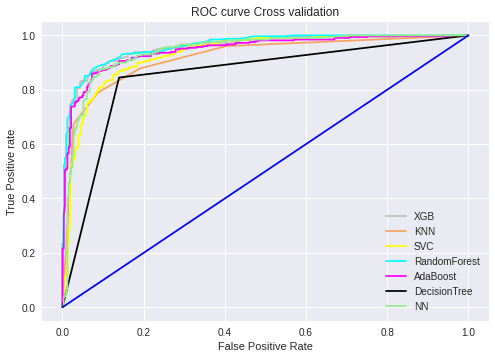

In [ ]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='solid',color='silver', label='XGB')
plt.plot(fpr2, tpr2, linestyle='solid',color='sandybrown', label='KNN')
plt.plot(fpr3, tpr3, linestyle='solid',color='yellow', label='SVC')
plt.plot(fpr4, tpr4, linestyle='solid',color='cyan', label='RandomForest')
plt.plot(fpr5, tpr5, linestyle='solid',color='magenta', label='AdaBoost')
plt.plot(fpr6, tpr6, linestyle='solid',color='black', label='DecisionTree')
plt.plot(fpr7, tpr7, linestyle='solid',color='lightgreen', label='NN')
plt.plot(p_fpr, p_tpr, linestyle='solid', color='blue')
# title
plt.title('ROC curve Cross validation')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC curve Cross validation',dpi=300)
plt.show();

In [ ]:
# model1 XGBClassifier
# model2 knn

#model3 SVC

# model4 RandomForestClassifier

# model5 AdaBoostClassifier

# model6 DecisionTreeClassifier

# model7 MLPClassifier

